In [3]:
import sklearn.svm as svm

svm_clf = svm.LinearSVC()

In [4]:
X_train = [  [1,2],[5,6],[2,3],[6,7],[3,1],[7,5]  ]
y_train = [0,1,0,1,0,1]

In [5]:
# 학습 끝

clf = svm_clf.fit(X_train, y_train)

In [7]:
# 다른 데이터에서 예측

X_test = [[1.5, 3.1], [4, 4.5], [6.7, 4.7]]
y_test = [0,0,1]

y_pred = clf.predict(X_test)
y_pred

array([0, 1, 1])

In [8]:
import sklearn.metrics as mt

score = mt.accuracy_score(y_test, y_pred)
print("정확도: {:.3f}".format(score))

정확도: 0.667


사이킷런으로 선형 SVM (하드 마진) 분류 수행

In [10]:
import sklearn.svm as svm

svm_clf = svm.SVC(kernel="linear")

In [11]:
X_train = [  [1,2],[5,6],[2,3],[6,7],[3,1],[7,5]  ]
y_train = [0,1,0,1,0,1]

In [12]:
clf = svm_clf.fit(X_train, y_train)

In [13]:
X_test = [[1.5, 3.1], [4, 4.5], [6.7, 4.7]]
y_test = [0,0,1]

y_pred = clf.predict(X_test)
y_pred

array([0, 1, 1])

스케일링

In [15]:
import sklearn.preprocessing as pp
import sklearn.svm as svm

X_train = [[item[0], item[1] * 10] for item in X_train]
y_train = [0,1,0,1,0,1]

svm_clf = svm.SVC(kernel="linear")

scl = pp.StandardScaler()    # 전처리 할 준비
X_train = scl.fit_transform(X_train)  # 전처리(표준정규분포) 됨

clf = svm_clf.fit(X_train, y_train)

In [1]:
import sklearn.svm as svm

svm_clf = svm.SVC(kernel="linear")

X_train = [[1,2],[5,6],[2,3],[6,7],[3,1],[7,5]]
y_train=[0,1,0,1,0,1]

clf=svm_clf.fit(X_train, y_train)

In [2]:
clf

SVC(kernel='linear')

In [4]:
dir(clf)

['C',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_check_n_features',
 '_check_proba',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_dense_predict_proba',
 '_dual_coef_',
 '_estimator_type',
 '_gamma',
 '_get_coef',
 '_get_param_names',
 '_get_tags',
 '_impl',
 '_intercept_',
 '_more_tags',
 '_n_support',
 '_pairwise',
 '_predict_log_proba',
 '_predict_proba',
 '_probA',
 '_probB',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sparse',
 '_spa

끝에 _가 있는 것은 attribute, 속성.  
class_weight_, coef_, intercept_, ..  
모형에 대한 결과들

In [6]:
import numpy as np

xx=np.linspace(0,8)

yy = - (clf.coef_[0][0] / clf.coef_[0][1]) * xx - \
clf.intercept_/clf.coef_[0][1]

In [10]:
X_test = [[1.5, 3.1], [4, 4.5], [6.7, 4.7]]
y_test = [0, 0, 1]

y_pred = clf.predict(X_test)

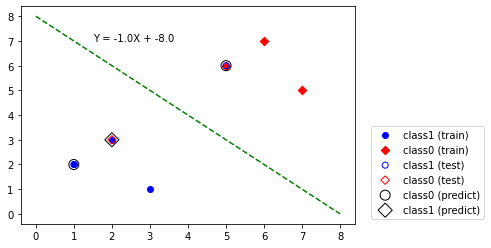

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

c_set = ["blue", "red"]
m_set = ["o", "D"]
l_train_set = ['class1 (train)', "class0 (train)"]
l_test_set = ['class1 (test)', "class0 (test)"]

for t in set(y_train):
    XX_pts = [X_train[i][0] for i in range(len(y_train)) if y_train[i] == t]
    YY_pts = [X_train[i][1] for i in range(len(y_train)) if y_train[i] == t]
    plt.scatter(XX_pts, YY_pts, color=c_set[t], marker=m_set[t], label=l_train_set[t])
    
for t in set(y_test):
    XX_pts = [X_train[i][0] for i in range(len(y_test)) if y_test[i] == t]
    YY_pts = [X_train[i][1] for i in range(len(y_test)) if y_test[i] == t]
    plt.scatter(XX_pts, YY_pts, color=c_set[t], marker=m_set[t], label=l_test_set[t], \
                edgecolors=c_set[t], facecolors='none')

l_pred_set = ["class0 (predict)", "class1 (predict)"]
for t in set(y_pred):
    XX_pts = [X_train[i][0] for i in range(len(y_test)) if y_test[i] == t]
    YY_pts = [X_train[i][1] for i in range(len(y_test)) if y_test[i] == t]
    plt.scatter(XX_pts, YY_pts, color=c_set[t], marker=m_set[t], label=l_pred_set[t], \
                edgecolors="black", facecolors='none', s=100)

plt.plot(xx, yy, color="green", linestyle="--")

A = np.round(- (clf.coef_[0][0] / clf.coef_[0][1]), 2)
b = np.round(clf.intercept_[0]/clf.coef_[0][1], 2)
f = "Y = {}X + {}".format(str(A), str(b))
plt.text(1.5, 7, s=f)
plt.xlabel = 'test'
plt.legend(loc='lower right', bbox_to_anchor=(1.4, 0))

하드마진분류

In [36]:
import sklearn.datasets as d

iris = d.load_iris()

X = iris.data
y = (iris.target == 2).astype(np.int)

In [40]:
import sklearn.model_selection as ms
import sklearn.metrics as mt
import sklearn.svm as svm

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.3, random_state=29
                                                    )

clf=svm.SVC(kernel = "linear").fit(X_train, y_train)

y_pred= clf.predict(X_test)

print("정확도=", mt.accuracy_score(y_test, y_pred))
print(mt.confusion_matrix(y_test, y_pred))
print(mt.classification_report(y_test, y_pred))

정확도= 0.9777777777777777
[[27  1]
 [ 0 17]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
linea